In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

# import xgboost as xgb

C:\Users\Brand\AppData\Local\Temp\ipykernel_37136\3778124204.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
data_path = Path(r"C:\Users\Brand\project_env\Scikit-Learn-Fundamentals\SciKit-Data Science\data\Binary Prediction of Smoker Status using Bio-Signals")
train_data_path = data_path / "train.csv"
test_data_path = data_path / "test.csv"

train_data = pd.read_csv(train_data_path, index_col=0)

In [7]:
train_data.head(10)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1
5,50,170,55,51.0,1.2,1.2,1,1,146,95,...,31,99,15.9,1,0.7,24,42,119,1,1
6,45,160,55,69.0,1.5,1.2,1,1,150,88,...,69,122,13.0,1,0.7,17,12,16,0,0
7,55,155,60,84.5,0.7,0.9,1,1,137,91,...,51,198,14.5,1,0.7,16,15,16,0,0
8,40,165,70,89.0,0.7,1.0,1,1,130,80,...,59,150,15.7,1,0.9,24,21,31,0,1


In [8]:
train_data.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

### Understanding Our Features

1. HDL
    - High Density Lipoprotein
    - Considered as "Good" Proteins
    - Absorbs cholestral from other parts of the body and carries it to the liver, where it is removed from the body
    - 
3. LDL
4. Urine Protein
5. Gtp
6. Relaxation
7. Serum Creatinine

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin           1

In [10]:
train_data.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


C:\Users\Brand\AppData\Local\Temp\ipykernel_37136\3479043412.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[i], data=categorical_data[col].value_counts(), palette="rocket")
C:\Users\Brand\AppData\Local\Temp\ipykernel_37136\3479043412.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[i], data=categorical_data[col].value_counts(), palette="rocket")
C:\Users\Brand\AppData\Local\Temp\ipykernel_37136\3479043412.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[i], data=categorical_data[col].value_counts(), palette="rock

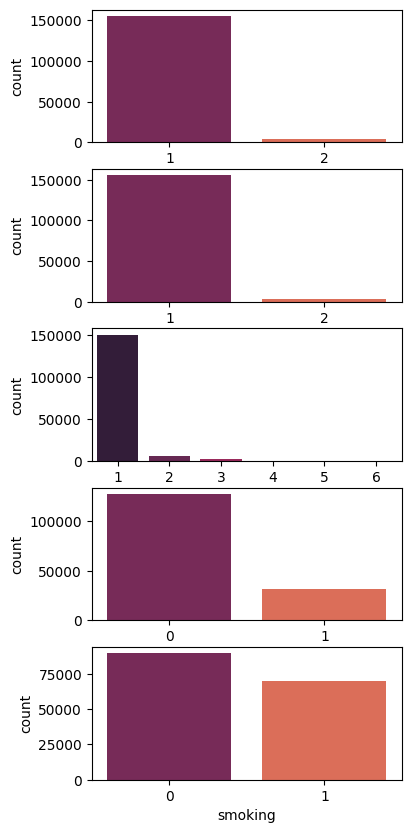

In [11]:
unique_data = [len(train_data[col].unique()) for col in train_data.columns]
unique_series = pd.Series(unique_data, index=train_data.columns)
categorical_data = train_data[unique_series[unique_series < 10].index]

fig, ax = plt.subplots(len(categorical_data.columns), figsize=(4,10))
for i, col in enumerate(categorical_data.columns):
    sns.barplot(ax=ax[i], data=categorical_data[col].value_counts(), palette="rocket")
    # ax[i].set_xlabel(col)
    # ax[i].yaxis.grid(True)

plt.show()

In [12]:
numeric_data = train_data.drop(columns=categorical_data.columns)
numeric_data["smoking"] = train_data["smoking"]
numeric_data.head(10)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,smoking
id,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,135,87,94,172,300,40,75,16.5,1.0,22,25,27,1
1,70,165,65,89.0,0.6,0.7,146,83,147,194,55,57,126,16.2,1.1,27,23,37,0
2,20,170,75,81.0,0.4,0.5,118,75,79,178,197,45,93,17.4,0.8,27,31,53,1
3,35,180,95,105.0,1.5,1.2,131,88,91,180,203,38,102,15.9,1.0,20,27,30,0
4,30,165,60,80.5,1.5,1.0,121,76,91,155,87,44,93,15.4,0.8,19,13,17,1
5,50,170,55,51.0,1.2,1.2,146,95,101,199,343,31,99,15.9,0.7,24,42,119,1
6,45,160,55,69.0,1.5,1.2,150,88,84,222,153,69,122,13.0,0.7,17,12,16,0
7,55,155,60,84.5,0.7,0.9,137,91,100,282,165,51,198,14.5,0.7,16,15,16,0
8,40,165,70,89.0,0.7,1.0,130,80,104,243,163,59,150,15.7,0.9,24,21,31,1


In [13]:
smokers_data = numeric_data[numeric_data["smoking"] == 1]
smokers_data.head(10)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,smoking
id,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,135,87,94,172,300,40,75,16.5,1.0,22,25,27,1
2,20,170,75,81.0,0.4,0.5,118,75,79,178,197,45,93,17.4,0.8,27,31,53,1
4,30,165,60,80.5,1.5,1.0,121,76,91,155,87,44,93,15.4,0.8,19,13,17,1
5,50,170,55,51.0,1.2,1.2,146,95,101,199,343,31,99,15.9,0.7,24,42,119,1
8,40,165,70,89.0,0.7,1.0,130,80,104,243,163,59,150,15.7,0.9,24,21,31,1
13,40,170,65,81.0,1.2,1.0,120,76,106,215,84,54,145,15.9,0.9,23,18,36,1
14,50,175,90,103.0,0.8,0.5,113,72,90,220,145,60,131,16.6,1.3,27,24,26,1
15,45,170,65,81.8,0.7,0.7,111,84,102,204,180,52,117,18.0,0.9,18,20,33,1
18,40,175,90,92.0,0.5,1.0,138,88,124,189,199,44,106,16.4,1.1,40,53,44,1


In [14]:
non_smokers_data = numeric_data[~(numeric_data["smoking"] == 1)]
non_smokers_data.head(10)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,smoking
id,,,,,,,,,,,,,,,,,,,
1,70,165,65,89.0,0.6,0.7,146,83,147,194,55,57,126,16.2,1.1,27,23,37,0
3,35,180,95,105.0,1.5,1.2,131,88,91,180,203,38,102,15.9,1.0,20,27,30,0
6,45,160,55,69.0,1.5,1.2,150,88,84,222,153,69,122,13.0,0.7,17,12,16,0
7,55,155,60,84.5,0.7,0.9,137,91,100,282,165,51,198,14.5,0.7,16,15,16,0
9,40,155,50,73.0,1.5,1.5,105,70,64,183,27,55,122,13.2,0.7,22,16,14,0
10,40,155,50,68.0,0.8,0.6,107,60,71,165,76,48,101,12.9,0.7,17,11,8,0
11,50,160,45,64.0,1.2,1.5,105,73,85,217,50,81,126,13.6,0.8,25,17,15,0
12,40,155,55,80.0,0.8,0.8,95,65,84,163,94,89,56,12.6,0.7,21,15,9,0
16,40,160,65,78.0,1.2,1.0,130,81,102,222,51,71,141,8.6,0.8,16,12,11,0


In [15]:
def box_plot(smoker_data, non_smoker_data, colors=["lightgreen", "pink"]):
    rows = int(len(smoker_data.columns) / 2)
    cols = 2
    fig, ax = plt.subplots(rows, cols, figsize=(10, 40))
    
    for i, col in enumerate(smoker_data.columns):
        if col == "smoking":
            break
        j = i % cols
        
        ax[i % rows, j].set_title(col)
        ax[i % rows, j].yaxis.grid(True)
        
        data = [smoker_data[col], non_smoker_data[col]]
        boxplot = ax[i % rows, j].boxplot(data, labels=[f"smoker {col}", f"nonsmoker {col}"], patch_artist=True, notch=True)
            
        for patch, color in zip(boxplot["boxes"], colors):
            patch.set_facecolor(color)
            
    plt.show()

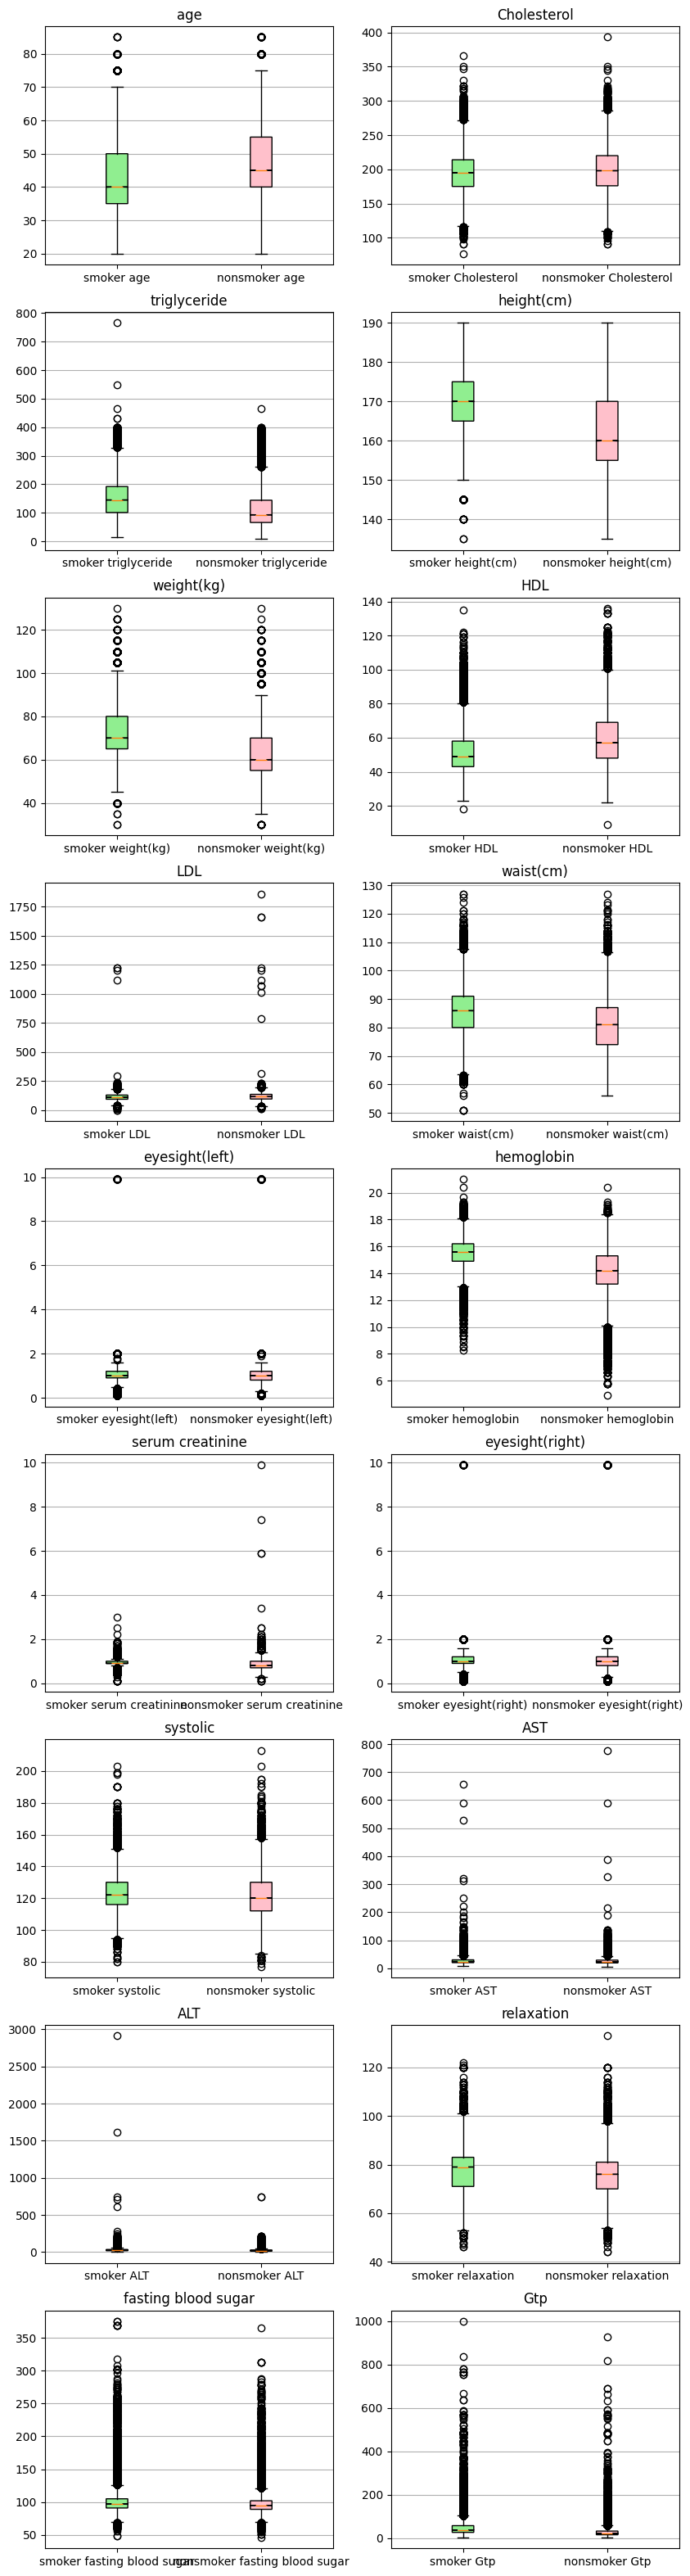

In [16]:
box_plot(smokers_data, non_smokers_data)

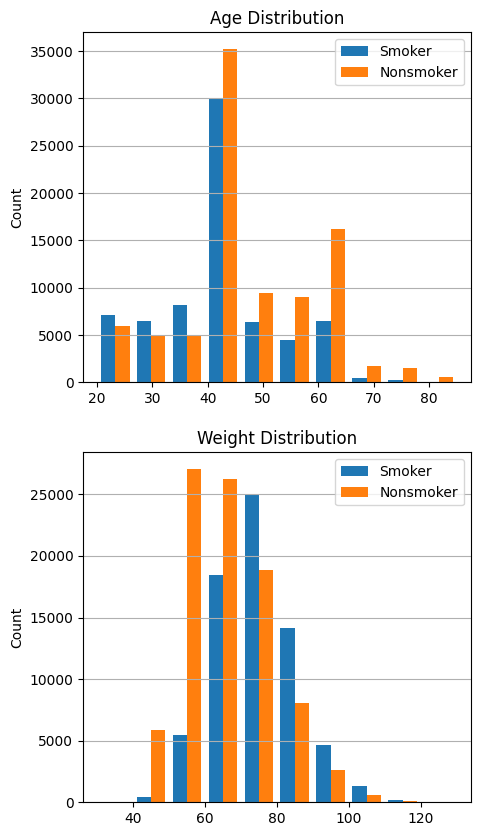

In [17]:
fig,(ax1, ax2) = plt.subplots(2, figsize=(5,10))
ax1.set_title("Age Distribution")
labels = ["Smoker", "Nonsmoker"] 
ax1.hist([smokers_data.age, non_smokers_data.age], label=labels)
ax1.set_ylabel("Count")
ax1.yaxis.grid(True)
ax1.legend()

ax2.set_title("Weight Distribution")
ax2.set_ylabel("Count")
ax2.yaxis.grid(True)
ax2.hist([smokers_data["weight(kg)"], non_smokers_data["weight(kg)"]], label=labels)
ax2.legend()
plt.show()

In [58]:
# fig, ax = plt.subplots(figsize=(15,6))
# smoker_age = sns.kdeplot(ax=ax, data=smokers_data.age, label="smoker_age")
# non_smoker_age = sns.kdeplot(ax=ax, data=non_smokers_data.age, label="non_smoker_age")
# plt.legend()

def plot_distribution_curves(smoker_data, non_smoker_data):

    rows = int(len(smoker_data.columns) / 2)
    cols = 2
    fig, ax = plt.subplots(rows, cols, figsize=(15, 45))
    
    for i, col in enumerate(smoker_data.columns):
        if col == "smoking":
            break
        
        j = i % cols
        
        ax[i % rows, j].set_title(f"{col.capitalize()} Distribution Curve")
        ax[i % rows, j].set_ylabel("Count")
        ax[i % rows, j].yaxis.grid(True)
        
        smoker_age = sns.kdeplot(ax=ax[i % rows, j], data=smokers_data[col], label=f"smoker {col}")
        non_smoker_age = sns.kdeplot(ax=ax[i % rows, j], data=non_smokers_data[col], label=f"nonsmoker {col}")
        ax[i % rows, j].legend()
            
            
    plt.show()

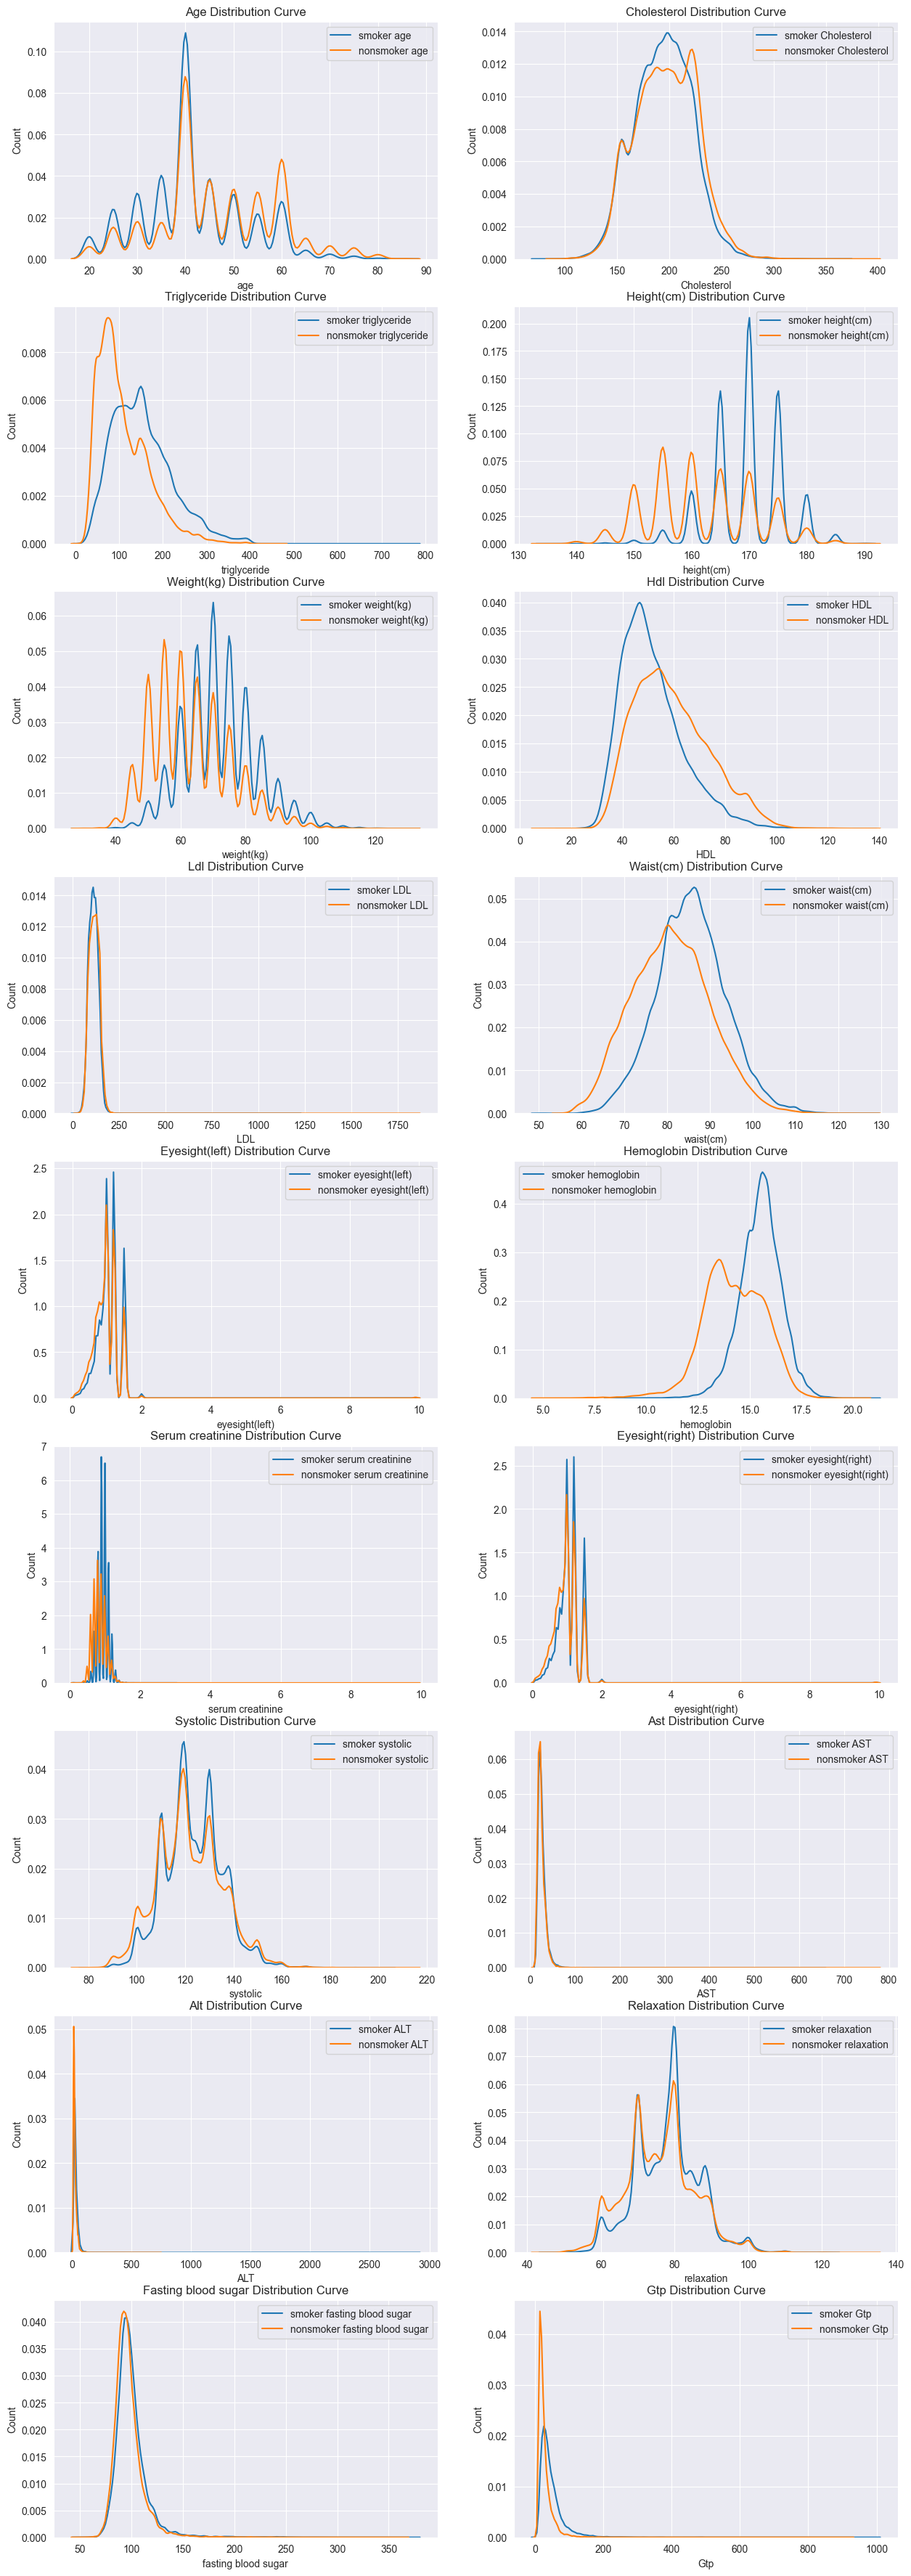

In [59]:
plot_distribution_curves(smokers_data, non_smokers_data)

In [20]:
def plot_distributions(smoker_data, non_smoker_data):

    rows = int(len(smoker_data.columns) / 2)
    cols = 2
    labels = ["Smoker", "Nonsmoker"]
    fig, ax = plt.subplots(rows, cols, figsize=(10, 40))
    
    for i, col in enumerate(smoker_data.columns):
        if col == "smoking":
            break
            
        j = i % cols
        
        ax[i % rows, j].set_title(f"{col} Distribution")
        ax[i % rows, j].set_ylabel("Count")
        ax[i % rows, j].yaxis.grid(True)
        
        data = [smoker_data[col], non_smoker_data[col]]
        ax[i % rows, j].hist(data, label=labels)
        ax[i % rows, j].legend()
            
            
    plt.show()

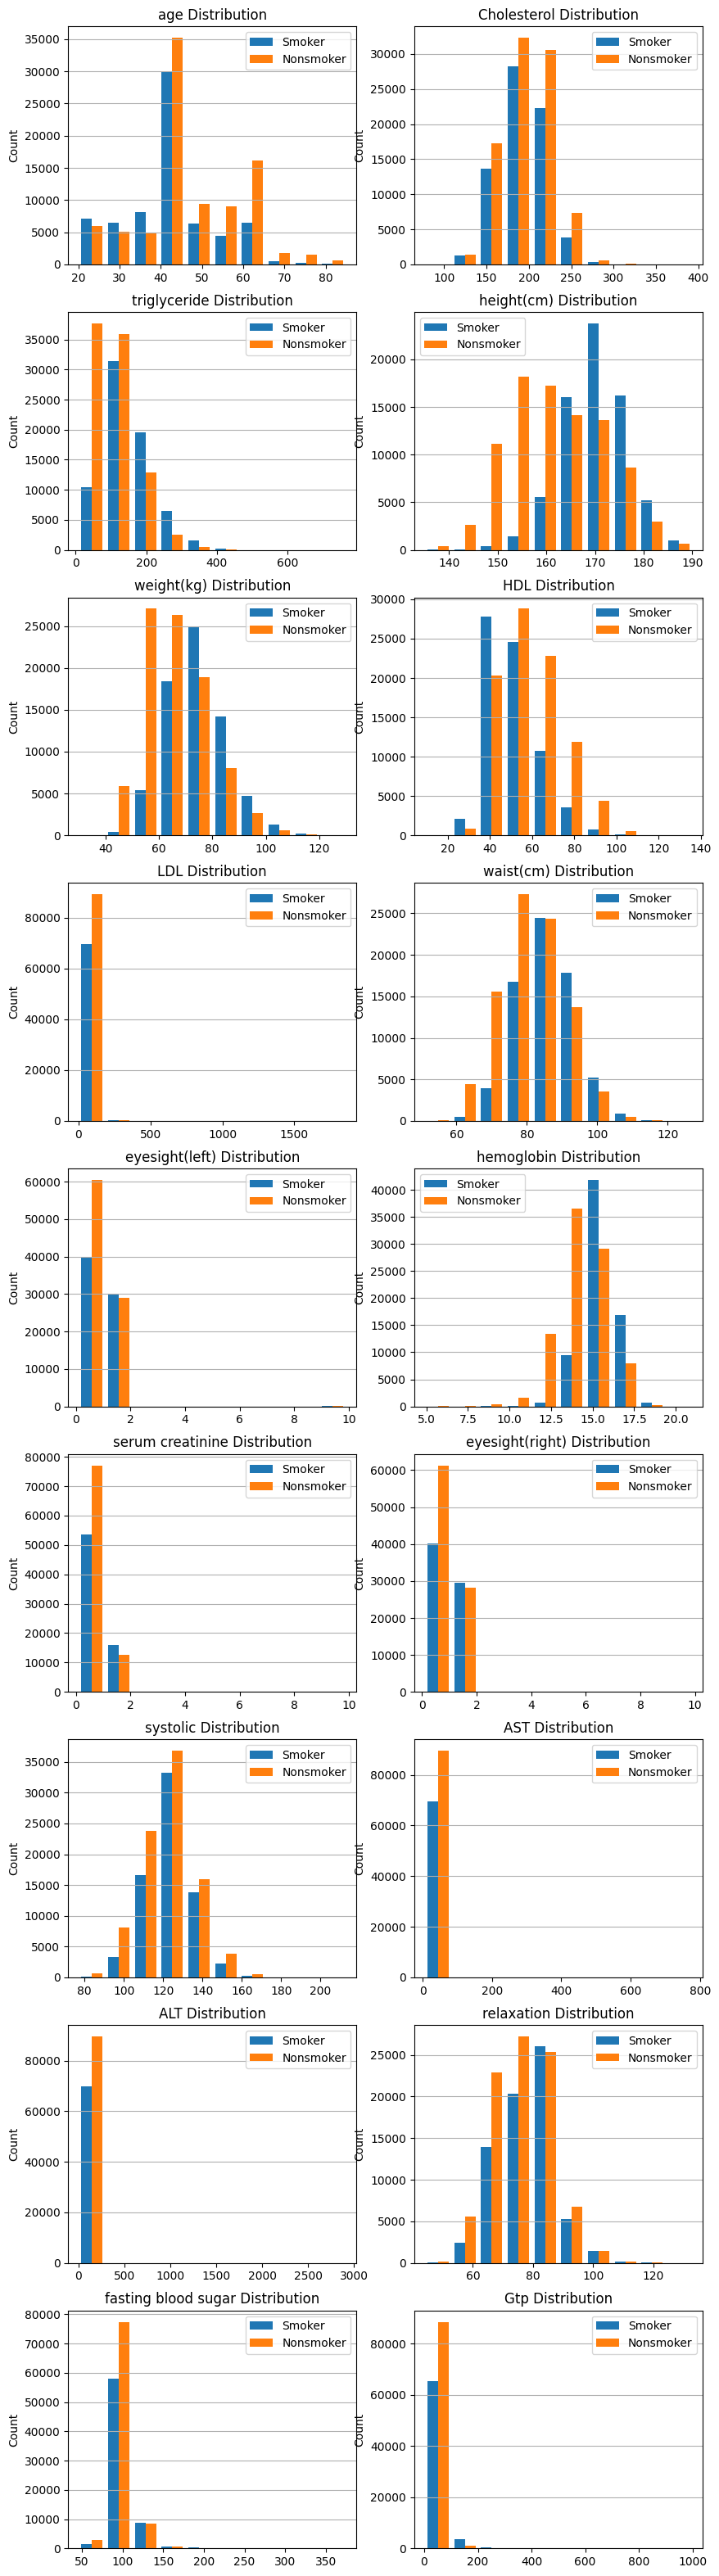

In [21]:
plot_distributions(smokers_data, non_smokers_data)

In [22]:
import scipy
from scipy.stats import ttest_ind

In [23]:
norm_tranformation = StandardScaler().fit_transform(train_data)
norm_data = pd.DataFrame(norm_tranformation, columns=train_data.columns)

norm_data.age.describe()
# When normalizing data, our mean becomes 0 while our standard deviation becomes 1


count    1.592560e+05
mean     2.248666e-17
std      1.000003e+00
min     -2.052535e+00
25%     -3.636662e-01
50%     -3.636662e-01
75%      9.029851e-01
max      3.436288e+00
Name: age, dtype: float64

In [24]:
X = train_data.drop(columns=["smoking"])
y = train_data["smoking"]

In [25]:
X.head(10)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,300,40,75,16.5,1,1.0,22,25,27,0
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,55,57,126,16.2,1,1.1,27,23,37,1
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,197,45,93,17.4,1,0.8,27,31,53,0
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,203,38,102,15.9,1,1.0,20,27,30,1
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,87,44,93,15.4,1,0.8,19,13,17,0
5,50,170,55,51.0,1.2,1.2,1,1,146,95,...,343,31,99,15.9,1,0.7,24,42,119,1
6,45,160,55,69.0,1.5,1.2,1,1,150,88,...,153,69,122,13.0,1,0.7,17,12,16,0
7,55,155,60,84.5,0.7,0.9,1,1,137,91,...,165,51,198,14.5,1,0.7,16,15,16,0
8,40,165,70,89.0,0.7,1.0,1,1,130,80,...,163,59,150,15.7,1,0.9,24,21,31,0


In [33]:
# used for discrete values
categorical_data_without_target = categorical_data.drop(columns=["smoking"])
m_info_class = pd.Series(mutual_info_classif(categorical_data_without_target,y), index=categorical_data_without_target.columns)
m_info_class.sort_values(ascending=False)

Urine protein     0.017344
hearing(right)    0.016311
hearing(left)     0.015329
dental caries     0.007365
dtype: float64

In [32]:
#used for continous values
numerical_data_without_target = numeric_data.drop(columns=["smoking"])
m_info_reg = pd.Series(mutual_info_regression(numerical_data_without_target ,y), index=numerical_data_without_target.columns)
m_info_reg.sort_values(ascending=False)

height(cm)             0.135380
hemoglobin             0.130392
Gtp                    0.097135
weight(kg)             0.078008
triglyceride           0.075267
serum creatinine       0.059160
waist(cm)              0.045609
HDL                    0.037056
ALT                    0.030516
age                    0.027504
relaxation             0.012501
LDL                    0.010010
eyesight(right)        0.009797
eyesight(left)         0.008488
systolic               0.007848
Cholesterol            0.007635
fasting blood sugar    0.007583
AST                    0.003941
dtype: float64

In [34]:
#R^2 value
correlation_train_data = numeric_data.corr(method="pearson")["smoking"] ** 2
correlation_train_data.sort_values(ascending=False)

smoking                1.000000
hemoglobin             0.203111
height(cm)             0.199908
weight(kg)             0.123727
triglyceride           0.110207
Gtp                    0.093368
serum creatinine       0.074517
HDL                    0.073542
waist(cm)              0.069019
age                    0.042450
ALT                    0.026574
eyesight(right)        0.012052
relaxation             0.011990
eyesight(left)         0.010084
fasting blood sugar    0.009319
LDL                    0.005225
AST                    0.003528
systolic               0.003439
Cholesterol            0.002693
Name: smoking, dtype: float64

<Axes: >

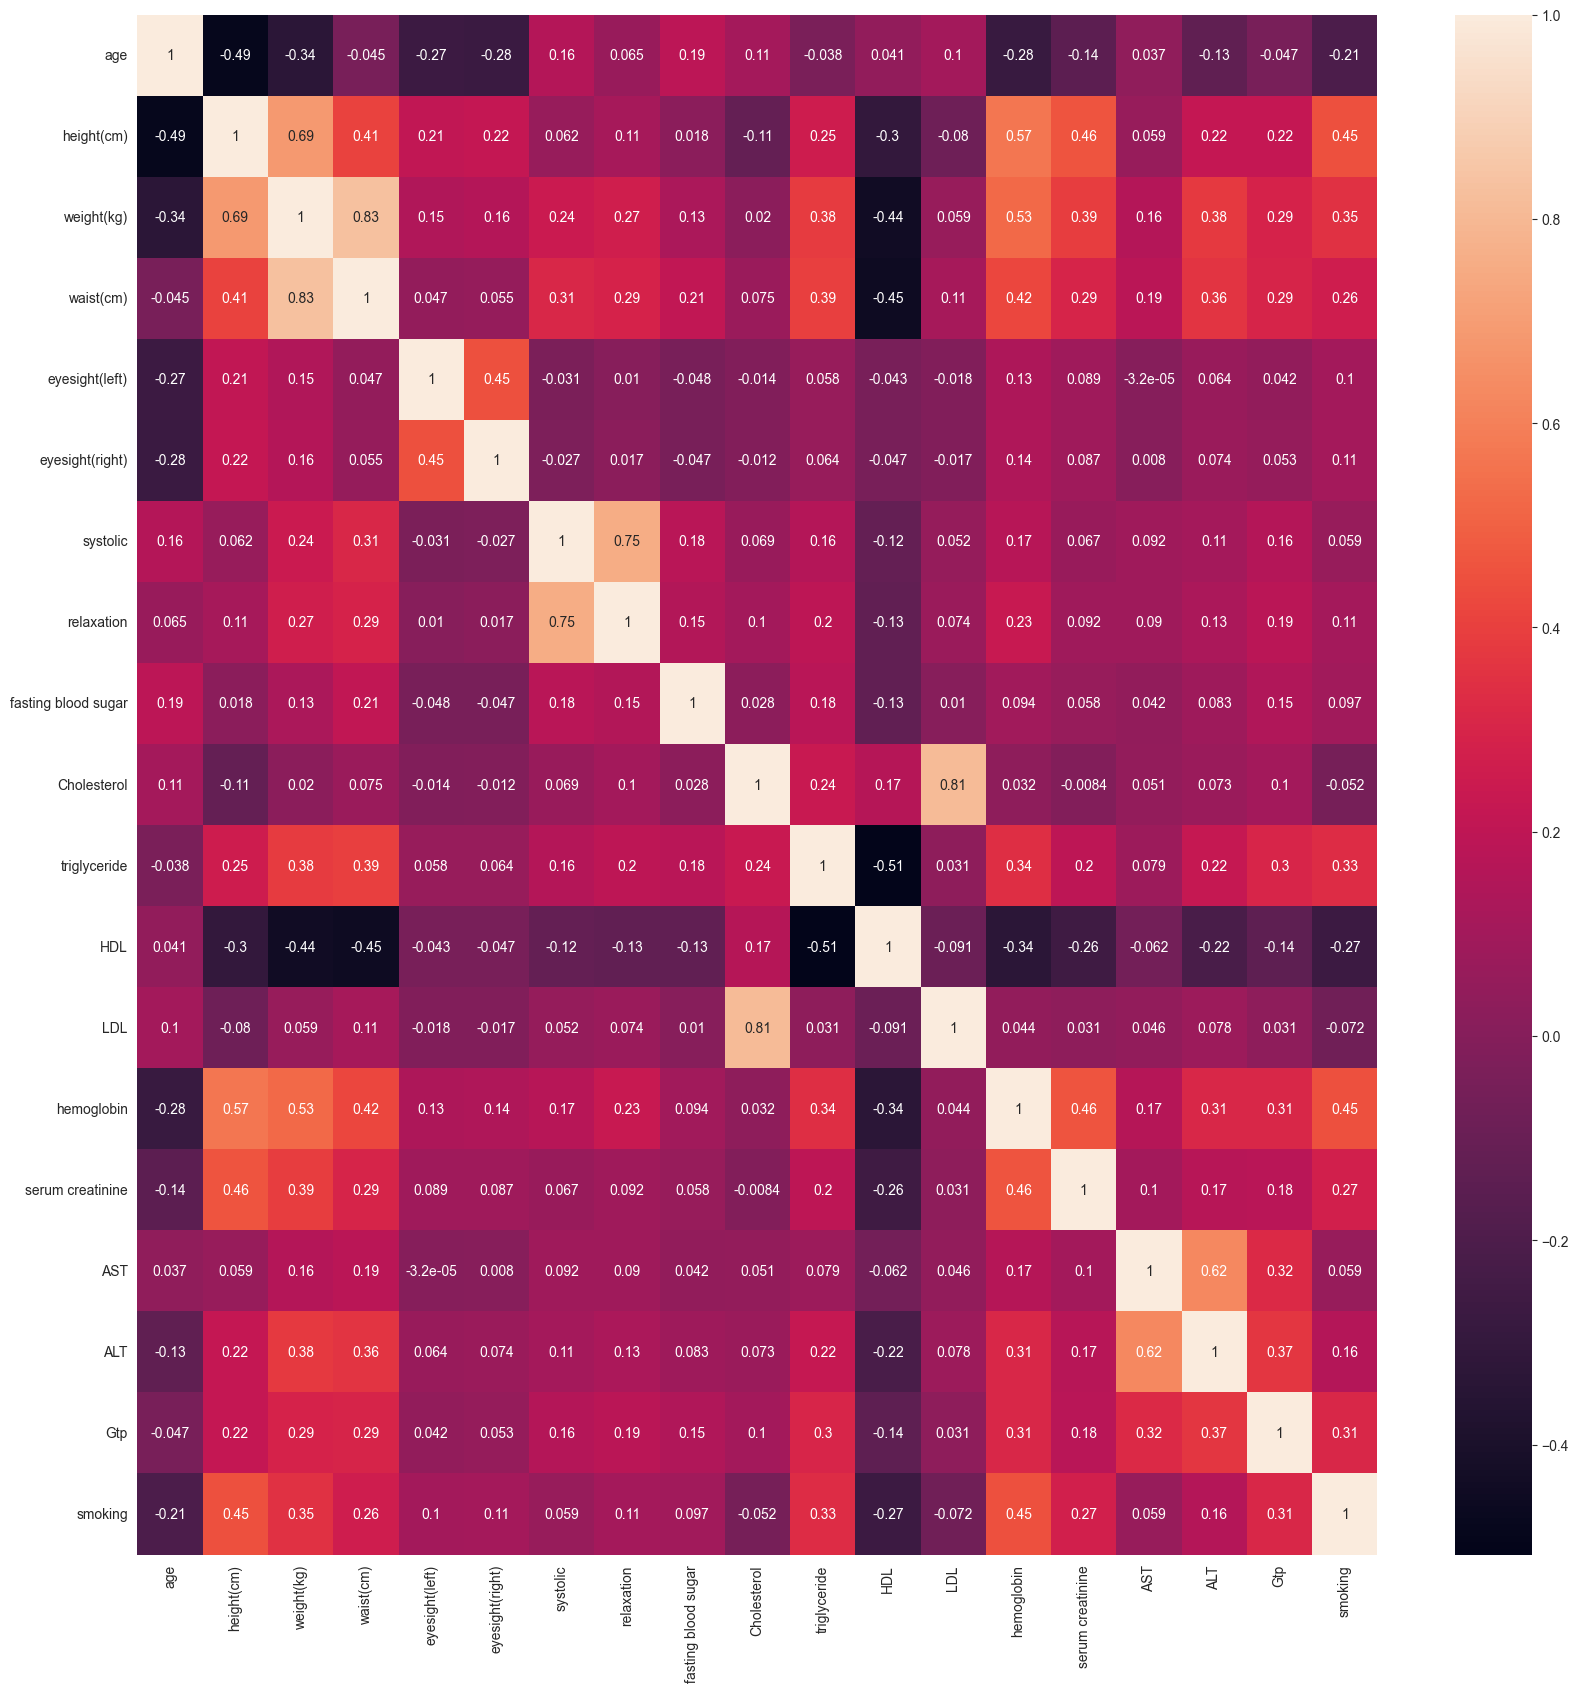

In [57]:
sns.set_style("darkgrid")
# sns.lmplot(numeric_data, x="age", y="height(cm)", hue="smoking", palette="mako")
# sns.scatterplot(numeric_data, x="age", y="height(cm)", hue="smoking", style="smoking", palette="mako")
plt.figure(figsize=(20,20))
sns.heatmap(numeric_data.corr(), annot=True)

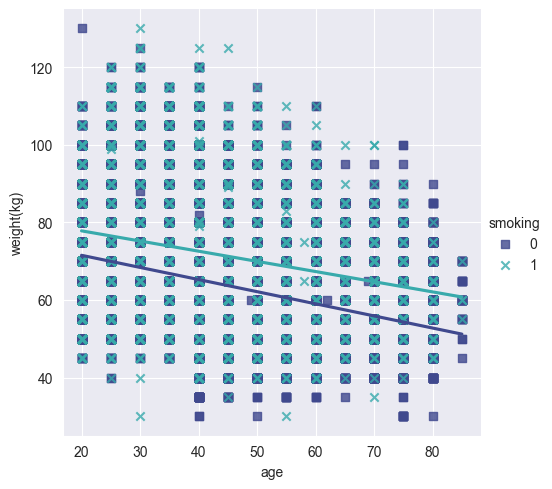

In [63]:
sns.lmplot(numeric_data, x="age", y="weight(kg)", hue="smoking", markers = ["s", "x"], palette="mako")

<Axes: xlabel='age', ylabel='eyesight(left)'>

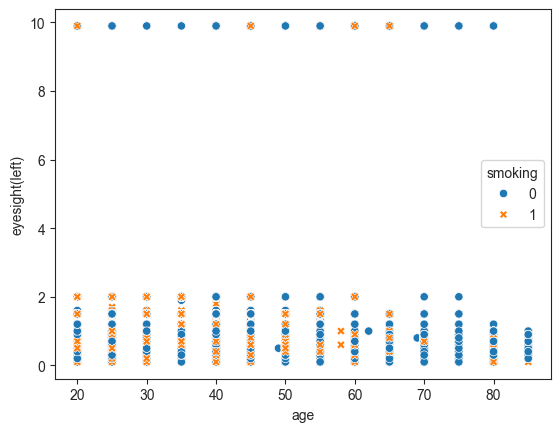

In [48]:
sns.scatterplot(numeric_data, x="age", y="eyesight(left)", hue="smoking", style="smoking")